In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing


# hyperparameter optimisation (HyperOpt) --> similar to curve_fit for sigmoid

In [2]:
pest_data = pd.read_csv("BinaryPesticideData.csv", delimiter=",")
pest_data[0:5]

,Pesticide Name,LOD,EPA Tolerance (ppm),ExactMolWt,HeavyAtomMolWt,NumRadicalElectrons,NumValenceElectrons,HeavyAtomCount,NHOHCount,NOCount,...,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,Class
0,Desmedipham,0.0269,NT,300.111007,284.186,0,114,22,2,6,...,2,4,2,6,4,0,0,0,2,1
1,Thiacloprid,0.0004,NT,252.023645,243.658,0,82,16,0,4,...,1,4,0,6,2,0,1,1,2,1
2,Phenthoate,0.0060,NT,320.030588,303.236,0,106,19,0,4,...,1,6,0,7,7,0,0,0,1,1
3,Fenthion,0.0024,NT,278.020023,263.215,0,90,16,0,3,...,1,5,0,6,5,0,0,0,1,1
4,Dinotefuran,0.0100,NT,202.106590,188.102,0,80,14,2,7,...,0,4,2,7,3,0,1,1,1,1


In [3]:
#Objective: Detect which pesticides will be tolerated and which will not

pest_data.tail()

,Pesticide Name,LOD,EPA Tolerance (ppm),ExactMolWt,HeavyAtomMolWt,NumRadicalElectrons,NumValenceElectrons,HeavyAtomCount,NHOHCount,NOCount,...,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,Class
222,Oxamyl,0.008,T,219.067762,206.162,0,80,14,1,6,...,0,5,1,7,1,0,0,0,0,2
223,Carfentrazone ethyl,0.003,T,411.036431,398.083,0,142,26,0,6,...,2,6,0,11,6,0,0,0,2,2
224,Endosulfan sulfate,0.007,T,419.811796,416.880,0,114,20,0,4,...,0,4,0,11,0,1,1,2,3,2
225,Acetamiprid,0.001,T,222.067224,211.591,0,78,15,0,4,...,1,3,0,5,2,0,0,0,1,2
226,Thiabendazole,0.030,T,201.036068,194.198,0,68,14,1,3,...,3,3,1,4,1,0,0,0,3,2


In [4]:
pest_data.count()

Pesticide Name              227
LOD                         227
EPA Tolerance (ppm)         227
ExactMolWt                  227
HeavyAtomMolWt              227
NumRadicalElectrons         227
NumValenceElectrons         227
HeavyAtomCount              227
NHOHCount                   227
NOCount                     227
NumAliphaticCarbocycles     227
NumAliphaticHeterocycles    227
NumAliphaticRings           227
NumAromaticCarbocycles      227
NumAromaticHeterocycles     227
NumAromaticRings            227
NumHAcceptors               227
NumHDonors                  227
NumHeteroatoms              227
NumRotatableBonds           227
NumSaturatedCarbocycles     227
NumSaturatedHeterocycles    227
NumSaturatedRings           227
RingCount                   227
Class                       227
dtype: int64

In [5]:
pest_data["Class"].dtype

dtype('int64')

In [6]:
pest_data.columns

Index(['Pesticide Name', 'LOD', 'EPA Tolerance (ppm)', 'ExactMolWt',
       'HeavyAtomMolWt', 'NumRadicalElectrons', 'NumValenceElectrons',
       'HeavyAtomCount', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles',
       'NumAliphaticHeterocycles', 'NumAliphaticRings',
       'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings',
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles',
       'NumSaturatedRings', 'RingCount', 'Class'],
      dtype='object')

In [7]:
pest_data.describe()

,LOD,ExactMolWt,HeavyAtomMolWt,NumRadicalElectrons,NumValenceElectrons,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,...,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,Class
count,227.000000,227.000000,227.000000,227.0,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,...,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,0.013992,314.329044,298.101727,0.0,110.634361,20.356828,0.722467,4.577093,0.215859,0.312775,...,1.268722,4.281938,0.660793,6.590308,4.383260,0.145374,0.189427,0.334802,1.797357,1.713656
std,0.027355,141.878676,132.130233,0.0,56.013772,10.205000,1.033756,2.493710,0.596535,1.040747,...,0.969919,2.494202,0.914197,2.954596,2.672091,0.452147,0.719066,0.932584,1.491389,0.453051
min,0.000100,44.026215,40.021000,0.0,18.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.002000,243.987613,228.380000,0.0,84.000000,15.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.006000,302.012602,285.065000,0.0,106.000000,19.000000,0.000000,4.000000,0.000000,0.000000,...,1.000000,4.000000,0.000000,6.000000,4.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,0.015000,352.158152,332.715000,0.0,124.000000,23.000000,1.000000,5.500000,0.000000,0.000000,...,2.000000,5.000000,1.000000,8.000000,6.000000,0.000000,0.000000,0.000000,2.000000,2.000000
max,0.250000,1730.968764,1589.017000,0.0,690.000000,123.000000,6.000000,28.000000,4.000000,12.000000,...,3.000000,28.000000,6.000000,28.000000,15.000000,4.000000,8.000000,8.000000,14.000000,2.000000


In [8]:
#pest_data.hist(column='Na_to_K', bins=100)

In [9]:
#pest_data.hist(column='Age', bins=50)

In [10]:
X = pest_data[['ExactMolWt',
       'HeavyAtomMolWt', 'NumRadicalElectrons', 'NumValenceElectrons',
       'HeavyAtomCount', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles',
       'NumAliphaticHeterocycles', 'NumAliphaticRings',
       'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings',
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles',
       'NumSaturatedRings', 'RingCount']].values


y = pest_data[['Class']].values
#y[0:5]

X[0:2]

array([[300.11100699, 284.186     ,   0.        , 114.        ,
         22.        ,   2.        ,   6.        ,   0.        ,
          0.        ,   0.        ,   2.        ,   0.        ,
          2.        ,   4.        ,   2.        ,   6.        ,
          4.        ,   0.        ,   0.        ,   0.        ,
          2.        ],
       [252.02364497, 243.658     ,   0.        ,  82.        ,
         16.        ,   0.        ,   4.        ,   0.        ,
          1.        ,   1.        ,   0.        ,   1.        ,
          1.        ,   4.        ,   0.        ,   6.        ,
          2.        ,   0.        ,   1.        ,   1.        ,
          2.        ]])

In [11]:
y_array = pest_data[['Class']].to_numpy()
y_array[0:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

### Convert categorical values to numerical values

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True) #random_state = 3
print ('X_train and y_train shape: ', X_train.shape, y_train.shape)
print ('X_test and y_test shape: ', X_test.shape, y_test.shape)

X_train and y_train shape:  (181, 21) (181, 1)
X_test and y_test shape:  (46, 21) (46, 1)


In [13]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_train[0:5]
X_test = StandardScaler().fit_transform(X_test)
X_test[0:2]

array([[-0.41307608, -0.49544291,  0.        , -0.18744943, -0.25544403,
        -0.68600908, -0.73148777, -0.45224923, -0.31391397, -0.40914163,
        -1.02328902, -0.73029674, -1.16971678, -0.64308275, -0.68733235,
        -1.20428757,  1.34626176, -0.3646984 , -0.33113309, -0.43477723,
        -0.95877915],
       [-0.01069374, -0.03258246,  0.        ,  0.01591552,  0.02838267,
        -0.68600908, -0.48941268, -0.45224923, -0.31391397, -0.40914163,
         0.15349335,  1.36930639,  0.75196079, -0.15005264, -0.68733235,
        -0.50305683, -0.61970779, -0.3646984 , -0.33113309, -0.43477723,
        -0.08543577]])

In [14]:
#Just to be sure

if X_train.shape[0] == y_train.shape[0]:
    print("Train set dimensions match and is equal to", X_train.shape, 'vs', y_train.shape)
else:
    print("Train set dimensions do not match")

Train set dimensions match and is equal to (181, 21) vs (181, 1)


### Modelling

In [15]:
drugTree = DecisionTreeClassifier(criterion="entropy", splitter='best', max_depth = 8)

# max_depth is often equal to number of features - 1 
#drugTree 

#Choice of 'entropy' to maximise the information gain per node
#choice of weighted information gain (p_i)

drugTree.fit(X_train, y_train.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [16]:
predTree = drugTree.predict(X_test)
predTree[0:5] # y_hat

array([2, 2, 2, 2, 2], dtype=int64)

In [17]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.5652173913043478


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           1       0.27      0.20      0.23        15
           2       0.66      0.74      0.70        31

    accuracy                           0.57        46
   macro avg       0.46      0.47      0.46        46
weighted avg       0.53      0.57      0.54        46



In [19]:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [20]:
'''

from sklearn.externals.six import StringIO
import pydotplus # provides a Python Interface to the Graphviz Dot language.
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

dot_data = StringIO()
filename = "drugtree.png"
featureNames = pest_data.columns[0:5]
targetNames = pest_data["Drug"].unique().tolist()

out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)

img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

'''

'\n\nfrom sklearn.externals.six import StringIO\nimport pydotplus # provides a Python Interface to the Graphviz Dot language.\nimport matplotlib.image as mpimg\nfrom sklearn import tree\n%matplotlib inline \n\ndot_data = StringIO()\nfilename = "drugtree.png"\nfeatureNames = pest_data.columns[0:5]\ntargetNames = pest_data["Drug"].unique().tolist()\n\nout=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  \ngraph = pydotplus.graph_from_dot_data(dot_data.getvalue())  \ngraph.write_png(filename)\n\nimg = mpimg.imread(filename)\nplt.figure(figsize=(100, 200))\nplt.imshow(img,interpolation=\'nearest\')\n\n'

In [21]:
drugTree.feature_importances_


array([0.12650449, 0.25706132, 0.        , 0.11793931, 0.12410073,
       0.        , 0.04581258, 0.        , 0.        , 0.05574558,
       0.        , 0.        , 0.        , 0.10182728, 0.05071622,
       0.        , 0.05501478, 0.        , 0.        , 0.        ,
       0.06527772])

In [22]:
drugTree.n_features_

21

In [23]:
drugTree.tree_.max_depth

8

### SVM

In [24]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', degree=3, class_weight="balanced") #test different kernels, class_weight, probability

clf_model = clf.fit(X_train, y_train.ravel())   #also, get the distance to the hyperplane

In [25]:
'''

sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, 
shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, 
verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)[source]¶

'''

# Implement probability!!!!

"\n\nsklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, \nshrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, \nverbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)[source]¶\n\n"

In [26]:

y_train.ravel()
y_train.shape

(181, 1)

In [27]:
y_hat = clf_model.predict(X_test)
y_hat

array([1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       2, 2], dtype=int64)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score #jaccard_similarity_score

In [29]:
print (classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           1       0.35      0.73      0.48        15
           2       0.73      0.35      0.48        31

    accuracy                           0.48        46
   macro avg       0.54      0.54      0.48        46
weighted avg       0.61      0.48      0.48        46



In [30]:
print ("f1_score: ", f1_score(y_test, y_hat, average='weighted'))
#print ("Jaccard similarity score: ", jaccard_similarity_score(y_test, y_hat))
print ("Confusion matrix: ", confusion_matrix(y_test, y_hat))

f1_score:  0.4782608695652174
Confusion matrix:  [[11  4]
 [20 11]]


In [31]:
from sklearn.metrics import multilabel_confusion_matrix

metrics.multilabel_confusion_matrix(y_test, y_hat, sample_weight=None, labels=None, samplewise=False)

array([[[11, 20],
        [ 4, 11]],

       [[11,  4],
        [20, 11]]], dtype=int64)

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=10, solver='liblinear').fit(X_train, y_train.ravel())
y_hat = LR.predict(X_test)
y_hat

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [33]:
y_hat_prob = LR.predict_proba(X_test)
y_hat_prob[0:10]

array([[0.3051632 , 0.6948368 ],
       [0.29370433, 0.70629567],
       [0.25576264, 0.74423736],
       [0.29652818, 0.70347182],
       [0.31385017, 0.68614983],
       [0.3027781 , 0.6972219 ],
       [0.19021048, 0.80978952],
       [0.22634214, 0.77365786],
       [0.26969602, 0.73030398],
       [0.32862537, 0.67137463]])

In [34]:
print (classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.67      1.00      0.81        31

    accuracy                           0.67        46
   macro avg       0.34      0.50      0.40        46
weighted avg       0.45      0.67      0.54        46



C:\Users\sahej\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sahej\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sahej\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
print ("f1_score: ", f1_score(y_test, y_hat, average='weighted'))
#print ("Jaccard similarity score: ", jaccard_similarity_score(y_test, y_hat))
print ("Confusion matrix: ", confusion_matrix(y_test, y_hat))

f1_score:  0.5426312817617166
Confusion matrix:  [[ 0 15]
 [ 0 31]]


### K-NN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

k = 4

#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k, weights="distance").fit(X_train, y_train.ravel()) #KNN_4
neigh

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [37]:
y_hat = neigh.predict(X_test)
y_hat



array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2], dtype=int64)

In [38]:
from sklearn import metrics
print('Train set Accuracy: ', metrics.accuracy_score(y_train, neigh.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, y_hat))

Train set Accuracy:  1.0
Test set Accuracy:  0.6086956521739131


In [39]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print (classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           1       0.33      0.20      0.25        15
           2       0.68      0.81      0.74        31

    accuracy                           0.61        46
   macro avg       0.50      0.50      0.49        46
weighted avg       0.56      0.61      0.58        46



In [40]:
# Larger k?

k = 6

neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.ravel())
y_hat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat6))

Train set Accuracy:  0.7679558011049724
Test set Accuracy:  0.6521739130434783


In [41]:
Ks = 10

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];   

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train.ravel())
    y_hat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)

    
    std_acc[n-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

#for i in range(len(mean_acc)):
#    print ("For K= ", i, "The accuracy is: ", mean_acc[i])
    
print ("Highest accuracy achieved: ", max(mean_acc))



Highest accuracy achieved:  0.6521739130434783


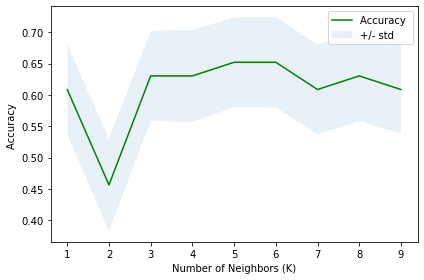

The best accuracy was with 0.6521739130434783 when k= 5


In [42]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print ("The best accuracy was with", mean_acc.max(), "when k=", mean_acc.argmax()+1)

In [43]:
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];   
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n, weights = 'distance', p=2).fit(X_train, y_train.ravel())
    y_hat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)

    
    std_acc[n-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

for i in range(len(mean_acc)):
    print (f"For K=, {i} The accuracy is: ", mean_acc[i])
    
print ("The best accuracy was with", mean_acc.max(), "when k=", mean_acc.argmax()+1)

For K=, 0 The accuracy is:  0.6086956521739131
For K=, 1 The accuracy is:  0.6086956521739131
For K=, 2 The accuracy is:  0.6086956521739131
For K=, 3 The accuracy is:  0.6086956521739131
For K=, 4 The accuracy is:  0.6304347826086957
For K=, 5 The accuracy is:  0.6304347826086957
For K=, 6 The accuracy is:  0.6304347826086957
For K=, 7 The accuracy is:  0.6086956521739131
For K=, 8 The accuracy is:  0.6304347826086957
For K=, 9 The accuracy is:  0.6086956521739131
For K=, 10 The accuracy is:  0.6304347826086957
For K=, 11 The accuracy is:  0.6521739130434783
For K=, 12 The accuracy is:  0.6739130434782609
For K=, 13 The accuracy is:  0.6521739130434783
For K=, 14 The accuracy is:  0.6739130434782609
For K=, 15 The accuracy is:  0.6739130434782609
For K=, 16 The accuracy is:  0.6956521739130435
For K=, 17 The accuracy is:  0.6739130434782609
For K=, 18 The accuracy is:  0.6956521739130435
For K=, 19 The accuracy is:  0.6739130434782609
For K=, 20 The accuracy is:  0.6956521739130435
Fo